In [36]:
%reload_ext autoreload
%autoreload 2

import random
from importlib import reload
import fidle
import numpy as np
from myutils.dataset import  read_dataset,labels_to_class_name
from myutils.models import get_model_v1,get_model_v2

In [37]:
enhanced_dir = './data-0.5-scale'  # can be change to be the output_dir used from fits notebook

dataset_name  = 'set-24x24-L'
batch_size    = 64
epochs        = 10
scale         = 1
fit_verbosity = 1

In [38]:
x_train,y_train,x_test,y_test,labels = read_dataset(enhanced_dir, dataset_name)
x_train,y_train, x_test,y_test = fidle.utils.rescale_dataset(x_train,y_train,x_test,y_test, scale=scale)

Datasets have been shuffled.
Datasets have been resized with a factor  1


x_train :  (666, 24, 24, 1)
y_train :  (666,)
x_test  :  (167, 24, 24, 1)
y_test  :  (167,)


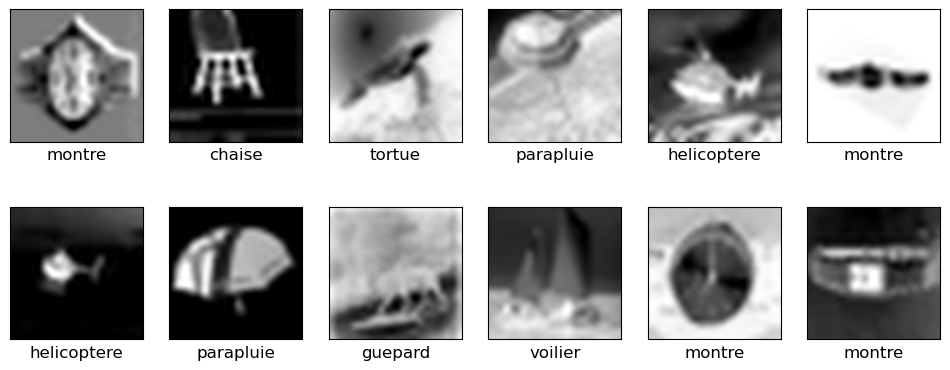

In [39]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)


samples = [ random.randint(0,len(x_train)-1) for i in range(12)]
fidle.scrawler.images(x_train,labels_to_class_name(labels,y_train),indices=samples,columns=6,x_size=2, y_size=2,fontsize=12)

In [40]:
(n,lx,ly,lz) = x_train.shape

print("Images of the dataset have this folowing shape : ",(lx,ly,lz))

model = get_model_v2(lx,ly,lz)

model.summary()

model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])


Images of the dataset have this folowing shape :  (24, 24, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 96)        960       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 96)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 96)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 192)       166080    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 192)        0         
 2D)                                                             
                                                          

In [41]:
history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 65ms/step - loss: 3.1368 - accuracy: 0.1171 - val_loss: 3.0224 - val_accuracy: 0.1078
Epoch 2/10
11/11 [==============================] - 1s 69ms/step - loss: 2.8636 - accuracy: 0.1787 - val_loss: 2.8931 - val_accuracy: 0.1317
Epoch 3/10
11/11 [==============================] - 1s 69ms/step - loss: 2.7136 - accuracy: 0.2222 - val_loss: 2.7033 - val_accuracy: 0.2395
Epoch 4/10
11/11 [==============================] - 1s 81ms/step - loss: 2.4479 - accuracy: 0.3183 - val_loss: 2.5050 - val_accuracy: 0.3533
Epoch 5/10
11/11 [==============================] - 1s 78ms/step - loss: 2.1728 - accuracy: 0.3874 - val_loss: 2.3274 - val_accuracy: 0.3653
Epoch 6/10
11/11 [==============================] - 1s 76ms/step - loss: 1.9324 - accuracy: 0.4384 - val_loss: 2.2939 - val_accuracy: 0.3892
Epoch 7/10
11/11 [==============================] - 1s 76ms/step - loss: 1.7508 - accuracy: 0.5045 - val_loss: 2.1046 - val_accuracy: 0.4012
Epoch 8/10
11

In [42]:
max_val_accuracy = max(history.history["val_accuracy"])
print("Max validation accuracy is : {:.4f}".format(max_val_accuracy))

Max validation accuracy is : 0.4311


In [43]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 2.0092
Test accuracy  : 0.4311


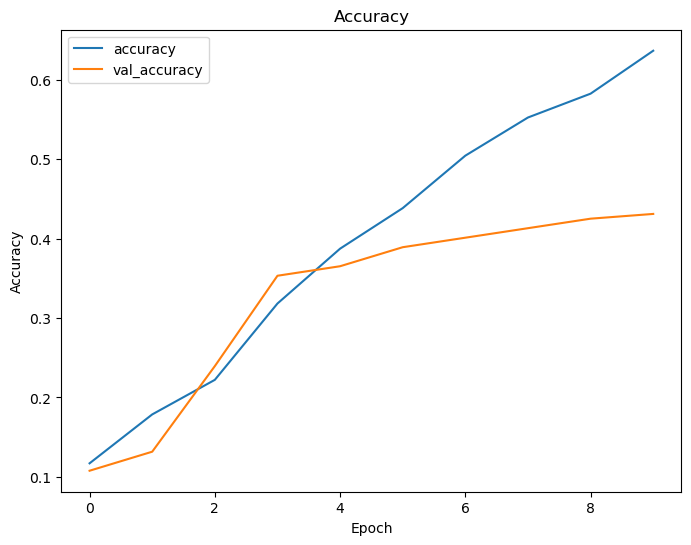

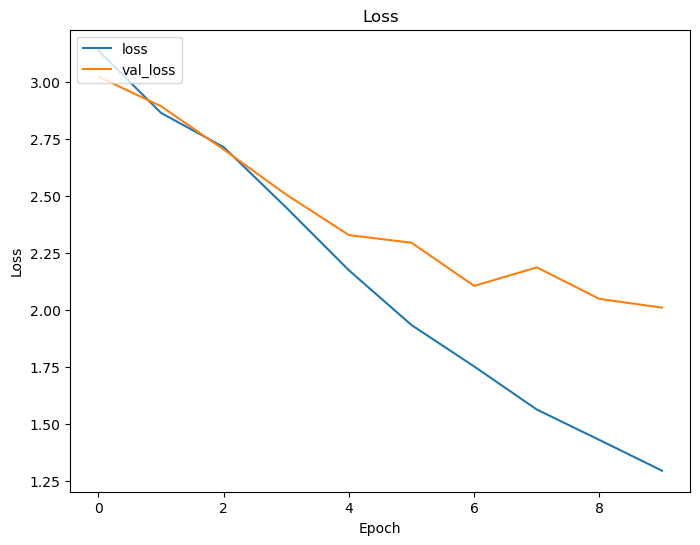

In [44]:
fidle.scrawler.history(history, save_as='01-history')

Testing

6/6 [==============================] - 0s 5ms/step


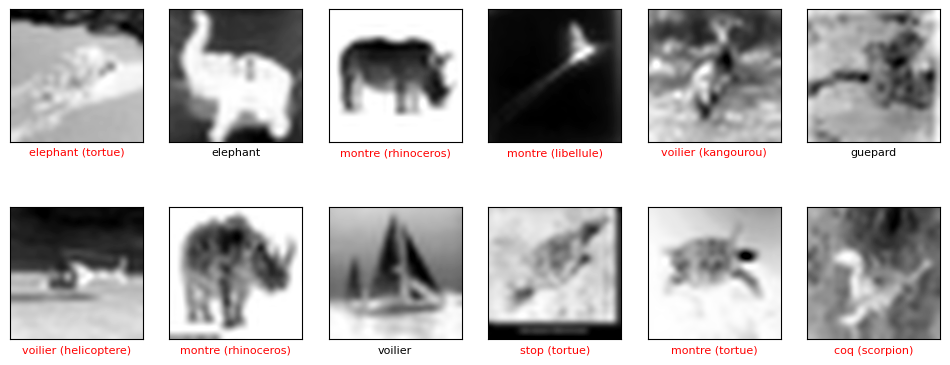

In [47]:

softmax_output = model.predict(x_test)
y_pred = np.argmax(softmax_output,axis=1)

samples = [ random.randint(0,len(x_test)-1) for i in range(12)]
fidle.scrawler.images(x_test,labels_to_class_name(labels,y_test),indices=samples,columns=6,x_size=2, y_size=2,fontsize=8,y_pred=labels_to_class_name(labels,y_pred))

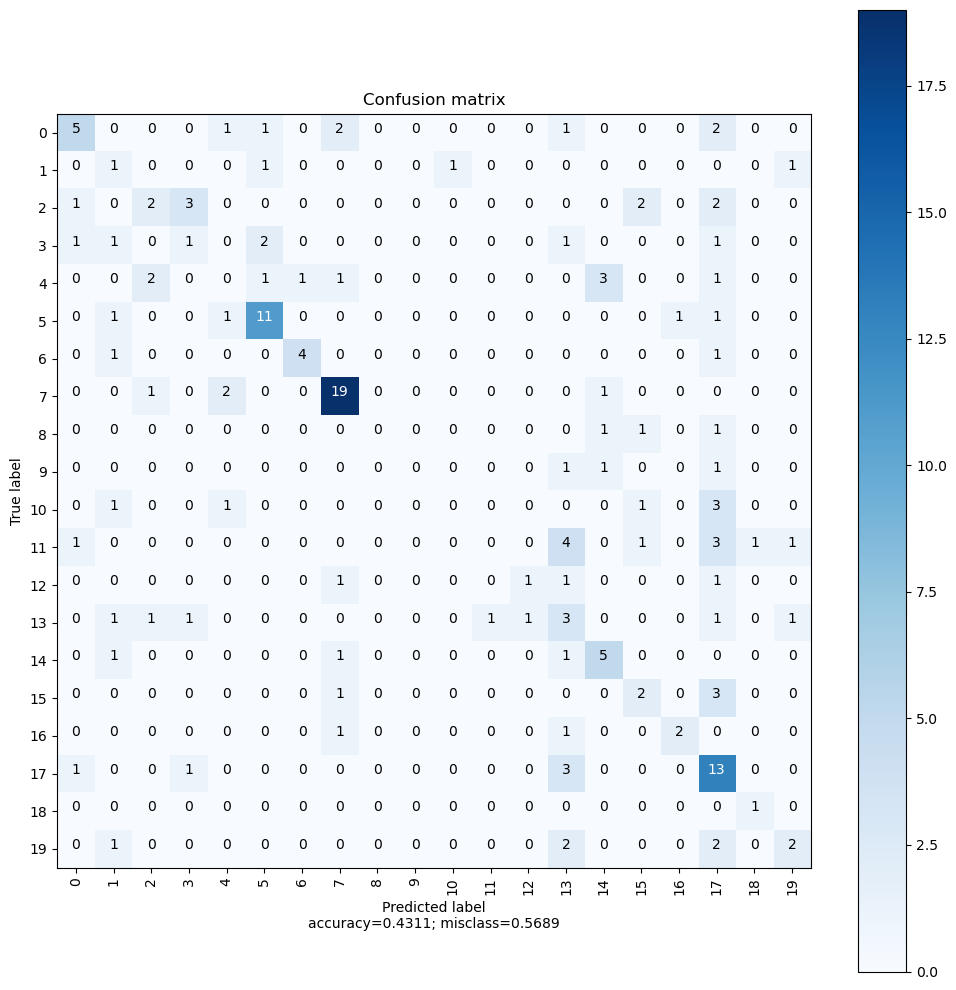

In [50]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(20), figsize=(10, 10),normalize=False,  save_as='confusion-matrix')